# This Notebook is to build the Model.

# LOAD THE DATASET

Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load Cleaned Data

In [ ]:
import pandas as pd

# Load the cleaned data
cleaned_df = pd.read_csv('/content/drive/MyDrive/dataset_latest/cleaned_combined_data.csv')

# ASSIGN ASPECT COLUMN




Now we want to create a column where it can categorize a sentiment based on the text that has been tweeted. Therefore we need to know the most frequent keywords that are often used in the dataset.

There are many ways to do categorization. The way it is done is based on the dataset we get.

The way I have chosen is to look at the most frequent keywords. After being able to identify the most frequent keywords, we do a rule-based (unsupervised) method by assigning suitable keywords in order to categorize the sentiments that have been tweeted.

**First Step:** Word Frequency Analysis

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-24-6778ce07e414>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=word_freq_df, palette='viridis')


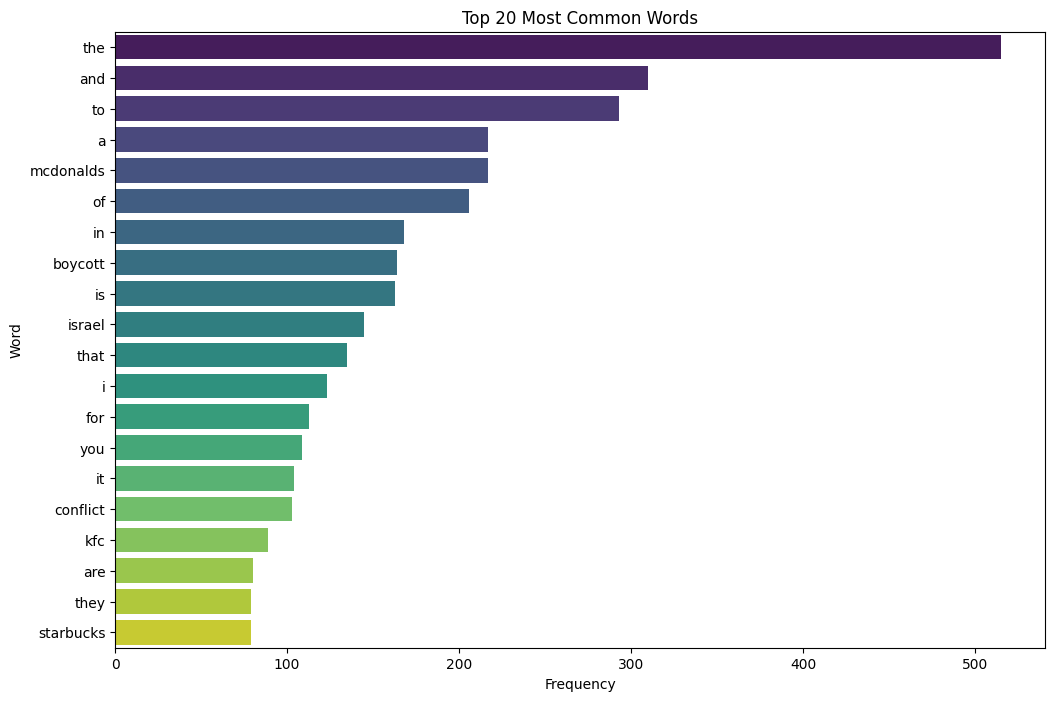

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure necessary NLTK data is downloaded
nltk.download('punkt')

# Combine all cleaned texts into one large string
all_text = ' '.join(cleaned_df['cleaned_text'])

# Tokenize the combined text
tokens = word_tokenize(all_text)

# Get the frequency distribution of words
freq_dist = Counter(tokens)

# Get the most common words
most_common_words = freq_dist.most_common(20)  # Adjust the number to show more/less words

# Convert the most common words to a DataFrame for easier plotting
word_freq_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Plot the most common words
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Word', data=word_freq_df, palette='viridis')
plt.title('Top 20 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


**Second Step**: Define Aspect Keywords and Function to Assign Aspects. we create ruled-based / unsupervised machine learning for "aspect"

In [ ]:
# Define Aspect Keywords
aspect_keywords = {
    'Boycott': ['boycott', 'ban', 'protest', 'boycotting', 'protesting', 'demonstration', 'blockade'],
    'Conflict': ['conflict', 'war', 'fight', 'battle', 'clash', 'hostility', 'combat', 'israel', 'palestine'],
    'Genocide': ['genocide', 'massacre', 'exterminate', 'holocaust', 'ethnic cleansing', 'slaughter', 'pogrom', 'conflict','kill']

}


# Function to assign aspects based on keywords
def assign_aspect(text, aspect_keywords):
    text_lower = text.lower()
    for aspect, keywords in aspect_keywords.items():
        if any(keyword in text_lower for keyword in keywords):
            return aspect
    return 'Other'

# Apply aspect assignment to the cleaned data
cleaned_df['Aspect'] = cleaned_df['cleaned_text'].apply(lambda x: assign_aspect(x, aspect_keywords))


In [ ]:
cleaned_df.head()

,id,text,cleaned_text,tokens,stemmed_tokens,lemmatized_tokens,createdAt,Aspect
0,1795243337038832128,@SunnyEdwards Britain created lots of conflict...,britain created lots of conflict in the middl...,"['britain', 'created', 'lots', 'conflict', 'mi...","['britain', 'creat', 'lot', 'conflict', 'middl...","['britain', 'created', 'lot', 'conflict', 'mid...",Mon May 27 23:59:00 +0000 2024,Conflict
1,1795236229086110208,"Ireland, Norway and Spain admitted the Palesti...",ireland norway and spain admitted the palestin...,"['ireland', 'norway', 'spain', 'admitted', 'pa...","['ireland', 'norway', 'spain', 'admit', 'pales...","['ireland', 'norway', 'spain', 'admitted', 'pa...",Mon May 27 23:30:45 +0000 2024,Conflict
2,1795235160134164736,@osodimezz @aventurineology @Lai_core If you r...,if you really want to blame someone i sugge...,"['really', 'want', 'blame', 'someone', 'sugges...","['realli', 'want', 'blame', 'someon', 'suggest...","['really', 'want', 'blame', 'someone', 'sugges...",Mon May 27 23:26:30 +0000 2024,Conflict
3,1795232029841273344,"@nspector4 Sounds nice, but at what cost to pu...",sounds nice but at what cost to public safety...,"['sounds', 'nice', 'cost', 'public', 'safety',...","['sound', 'nice', 'cost', 'public', 'safeti', ...","['sound', 'nice', 'cost', 'public', 'safety', ...",Mon May 27 23:14:04 +0000 2024,Conflict
4,1795227659091214592,"@Sandyboots2020 @BladeoftheS They can, if they...",they can if they read the sun telegraph mail...,"['read', 'sun', 'telegraph', 'mail', 'times', ...","['read', 'sun', 'telegraph', 'mail', 'time', '...","['read', 'sun', 'telegraph', 'mail', 'time', '...",Mon May 27 22:56:42 +0000 2024,Conflict


# BERT

BERT, which stands for Bidirectional Encoder Representations from Transformers, is based on transformers, a deep learning model in which every output element is connected to every input element, and the weightings between them are dynamically calculated based upon their connection.

# Test BERT Sentiment Analysis on Custom Text

Install and Import Required Libraries

In [ ]:
!pip install transformers

from transformers import pipeline


Define the BERT Sentiment Analysis Function

In [ ]:
# Load the BERT sentiment analysis pipeline
sentiment_pipeline = pipeline('sentiment-analysis')

# Function to test BERT sentiment analysis on custom text
def test_bert_sentiment(text):
    result = sentiment_pipeline(text)
    return result[0]

# Test the function with a sample text
sample_text = "I like my wife"
print(test_bert_sentiment(sample_text))


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'label': 'POSITIVE', 'score': 0.9998502731323242}


# Apply BERT Sentiment Analysis to the Dataset

Function to apply BERT sentiment analysis

In [ ]:
# Function to apply BERT sentiment analysis
def bert_sentiment_analysis(text):
    result = sentiment_pipeline(text)
    return result[0]['label']

# Apply the function to the cleaned data
cleaned_df['Sentiment'] = cleaned_df['cleaned_text'].apply(bert_sentiment_analysis)

Display the results

In [ ]:
print(cleaned_df[['cleaned_text', 'Aspect', 'Sentiment']].head())

                                        cleaned_text    Aspect Sentiment
0   britain created lots of conflict in the middl...  Conflict  NEGATIVE
1  ireland norway and spain admitted the palestin...  Conflict  POSITIVE
2     if you really want to blame someone i sugge...  Conflict  NEGATIVE
3   sounds nice but at what cost to public safety...  Conflict  NEGATIVE
4    they can if they read the sun telegraph mail...  Conflict  NEGATIVE


In [ ]:
cleaned_df.head()

,id,text,cleaned_text,tokens,stemmed_tokens,lemmatized_tokens,createdAt,Aspect,Sentiment
0,1795243337038832128,@SunnyEdwards Britain created lots of conflict...,britain created lots of conflict in the middl...,"['britain', 'created', 'lots', 'conflict', 'mi...","['britain', 'creat', 'lot', 'conflict', 'middl...","['britain', 'created', 'lot', 'conflict', 'mid...",Mon May 27 23:59:00 +0000 2024,Conflict,NEGATIVE
1,1795236229086110208,"Ireland, Norway and Spain admitted the Palesti...",ireland norway and spain admitted the palestin...,"['ireland', 'norway', 'spain', 'admitted', 'pa...","['ireland', 'norway', 'spain', 'admit', 'pales...","['ireland', 'norway', 'spain', 'admitted', 'pa...",Mon May 27 23:30:45 +0000 2024,Conflict,POSITIVE
2,1795235160134164736,@osodimezz @aventurineology @Lai_core If you r...,if you really want to blame someone i sugge...,"['really', 'want', 'blame', 'someone', 'sugges...","['realli', 'want', 'blame', 'someon', 'suggest...","['really', 'want', 'blame', 'someone', 'sugges...",Mon May 27 23:26:30 +0000 2024,Conflict,NEGATIVE
3,1795232029841273344,"@nspector4 Sounds nice, but at what cost to pu...",sounds nice but at what cost to public safety...,"['sounds', 'nice', 'cost', 'public', 'safety',...","['sound', 'nice', 'cost', 'public', 'safeti', ...","['sound', 'nice', 'cost', 'public', 'safety', ...",Mon May 27 23:14:04 +0000 2024,Conflict,NEGATIVE
4,1795227659091214592,"@Sandyboots2020 @BladeoftheS They can, if they...",they can if they read the sun telegraph mail...,"['read', 'sun', 'telegraph', 'mail', 'times', ...","['read', 'sun', 'telegraph', 'mail', 'time', '...","['read', 'sun', 'telegraph', 'mail', 'time', '...",Mon May 27 22:56:42 +0000 2024,Conflict,NEGATIVE


Save the final dataframe with aspects and sentiments

In [ ]:
cleaned_df.to_csv('/content/drive/MyDrive/dataset_latest/cleaned_combined_data_with_aspects_and_sentiments.csv', index=False)

# Evaluation Manually

 perform qualitative analysis and manual evaluation to understand the performance of the aspect classification and sentiment analysis.

In [ ]:
# Sample a few rows for manual inspection
sample_df = cleaned_df.sample(10)
print(sample_df[['cleaned_text', 'Aspect', 'Sentiment']])


                                          cleaned_text   Aspect Sentiment
372  even if the boycott didnt exist who the fuck d...  Boycott  NEGATIVE
244  boycott mcdonalds \nboycott disney plus\nboyco...  Boycott  NEGATIVE
358    oh look palestine is free thanks to this guy...  Boycott  NEGATIVE
435  i just saw an actual palestine protest for the...  Boycott  NEGATIVE
116                           i want the brutalist kfc    Other  NEGATIVE
449                   this is why i carry pepper spray    Other  NEGATIVE
476  yall are doing licorice so dirty wtf shes amazing    Other  POSITIVE
335  stand against israeli oppression in gaza by bo...  Boycott  NEGATIVE
163  kfc facing global boycotts over alleged ties t...  Boycott  NEGATIVE
134  as consumers we have the power to champion jus...  Boycott  POSITIVE


Qualitative Analysis

Perform qualitative analysis by analyzing the distribution of aspects and sentiments to see if they align with your expectations.

<ipython-input-34-50cded11a6e5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=cleaned_df, palette='viridis')


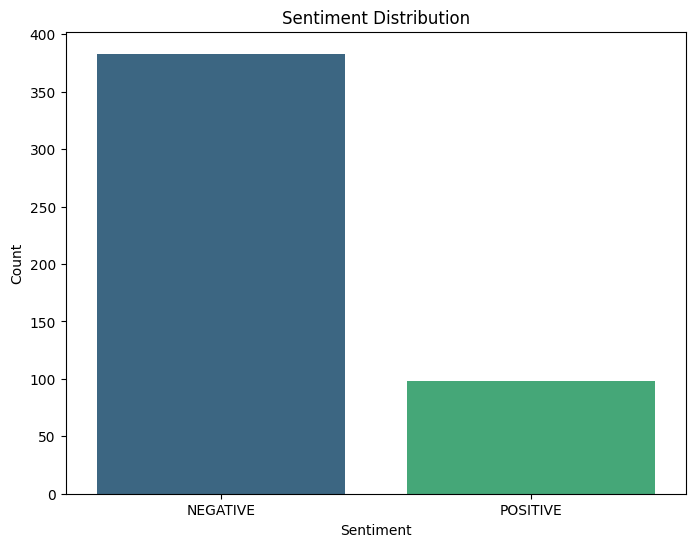

<ipython-input-34-50cded11a6e5>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Aspect', data=cleaned_df, palette='viridis', order=cleaned_df['Aspect'].value_counts().index)


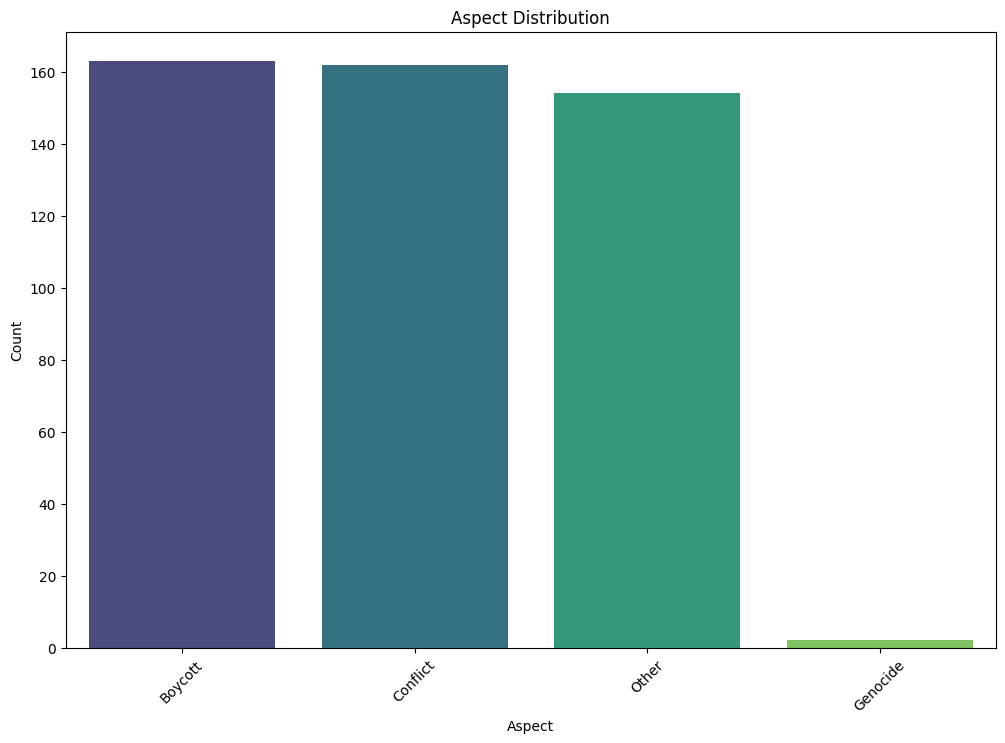

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of sentiments
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=cleaned_df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Plot the distribution of aspects
plt.figure(figsize=(12, 8))
sns.countplot(x='Aspect', data=cleaned_df, palette='viridis', order=cleaned_df['Aspect'].value_counts().index)
plt.title('Aspect Distribution')
plt.xlabel('Aspect')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Cross-Validation with Data Augmentation

Step 1: Create a Labeled Subset
Manually label a small subset of your data.

In [ ]:
# Hypothetical manually labeled data
labeled_data = {
    'cleaned_text': [
        "Boycott McDonald's products due to their support",
        "The conflict in the region is escalating",
        "There was a genocide in the region"
    ],
    'true_aspect': ['Boycott', 'Conflict', 'Genocide'],
    'true_sentiment': ['Negative', 'Negative', 'Negative']
}

labeled_df = pd.DataFrame(labeled_data)


Step 2: Evaluate Aspect Classification

In [ ]:
from sklearn.metrics import classification_report

# Function to assign aspects based on keywords
def assign_aspect(text, aspect_keywords):
    text_lower = text.lower()
    for aspect, keywords in aspect_keywords.items():
        if any(keyword in text_lower for keyword in keywords):
            return aspect
    return 'Other'

# Apply aspect assignment to the labeled data
labeled_df['predicted_aspect'] = labeled_df['cleaned_text'].apply(lambda x: assign_aspect(x, aspect_keywords))

# Evaluate aspect classification
true_aspects = labeled_df['true_aspect']
predicted_aspects = labeled_df['predicted_aspect']
print("Aspect Classification Report:")
print(classification_report(true_aspects, predicted_aspects))


Aspect Classification Report:
              precision    recall  f1-score   support

     Boycott       1.00      1.00      1.00         1
    Conflict       1.00      1.00      1.00         1
    Genocide       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



Step 3: Evaluate Sentiment Analysis

In [ ]:
# Function to apply BERT sentiment analysis
def bert_sentiment_analysis(text):
    result = sentiment_pipeline(text)
    return result[0]['label']

# Apply BERT sentiment analysis to the labeled data
labeled_df['predicted_sentiment'] = labeled_df['cleaned_text'].apply(bert_sentiment_analysis)

# Evaluate sentiment analysis
true_sentiments = labeled_df['true_sentiment']
predicted_sentiments = labeled_df['predicted_sentiment']
print("Sentiment Analysis Report:")
print(classification_report(true_sentiments, predicted_sentiments))


Sentiment Analysis Report:
              precision    recall  f1-score   support

    NEGATIVE       0.00      0.00      0.00       0.0
    Negative       0.00      0.00      0.00       3.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

# Model Evaluation

Import Libraries and Load Data (accuracy-testing)

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

# Load the labeled data from CSV
labeled_df = pd.read_csv('/content/drive/MyDrive/dataset_latest/accuracy_testing.csv')


Define Aspect Keywords and Assign Aspects

In [ ]:
# Define Aspect Keywords
aspect_keywords = {
    'Boycott': ['boycott', 'ban', 'protest', 'boycotting', 'protesting', 'demonstration', 'blockade'],
    'Conflict': ['conflict', 'war', 'fight', 'battle', 'clash', 'hostility', 'combat', 'israel', 'palestine'],
    'Genocide': ['genocide', 'massacre', 'exterminate', 'holocaust', 'ethnic cleansing', 'slaughter', 'pogrom', 'conflict', 'kill']
}

# Function to assign aspects based on keywords
def assign_aspect(text, aspect_keywords):
    text_lower = text.lower()
    for aspect, keywords in aspect_keywords.items():
        if any(keyword in text_lower for keyword in keywords):
            return aspect
    return 'Other'

# Apply aspect assignment to the labeled data
labeled_df['predicted_aspect'] = labeled_df['cleaned_text'].apply(lambda x: assign_aspect(x, aspect_keywords))


Evaluate Aspect Classification

In [ ]:
# Evaluate aspect classification
true_aspects = labeled_df['true_aspect']
predicted_aspects = labeled_df['predicted_aspect']
print("Aspect Classification Report:")
print(classification_report(true_aspects, predicted_aspects))


Aspect Classification Report:
              precision    recall  f1-score   support

     Boycott       1.00      1.00      1.00         9
    Conflict       1.00      1.00      1.00         9
    Genocide       1.00      1.00      1.00         9

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



Load BERT Pipeline and Define Sentiment Analysis Function

In [ ]:
!pip install transformers
from transformers import pipeline

# Load the BERT sentiment analysis pipeline
sentiment_pipeline = pipeline('sentiment-analysis')

# Function to apply BERT sentiment analysis and normalize labels
def bert_sentiment_analysis(text):
    result = sentiment_pipeline(text)
    return result[0]['label'].capitalize()  # Ensure consistent capitalization with true labels


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Apply Sentiment Analysis and Evaluate

In [ ]:
# Apply BERT sentiment analysis to the labeled data
labeled_df['predicted_sentiment'] = labeled_df['cleaned_text'].apply(bert_sentiment_analysis)

# Evaluate sentiment analysis
true_sentiments = labeled_df['true_sentiment']
predicted_sentiments = labeled_df['predicted_sentiment']
print("Sentiment Analysis Report:")
print(classification_report(true_sentiments, predicted_sentiments))


Sentiment Analysis Report:
              precision    recall  f1-score   support

    Negative       0.79      0.95      0.86        20
    Positive       0.67      0.29      0.40         7

    accuracy                           0.78        27
   macro avg       0.73      0.62      0.63        27
weighted avg       0.76      0.78      0.74        27

